In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

### Data ETL

In [9]:
nyts_data = pd.read_csv("data/nyts2022.csv")

/tmp/ipykernel_5413/2400439584.py:1: DtypeWarning: Columns (1,624,625,626,637,656,671,690,711,724,730,745,760,779,781,791,804,812,829,838,851,870,879,892,913,922,935,949,958,971,972,983,992,1005,1006,1017,1026,1039,1040,1051,1060,1073,1074,1085,1094,1107,1109,1120,1129,1142,1155,1164,1177) have mixed types. Specify dtype option on import or set low_memory=False.
  nyts_data = pd.read_csv("nyts2022.csv")


In [10]:
usable_data = nyts_data[['QN1', 'QN2', 'QN4B', 'QN4C', 'QN4D', 'QN4E', 'QN5A', 'QN5B', 'QN5C', 'QN5D', 'QN5E', 
                         'QN89', 'QN90', 'QN91', 'QN92', 'QN93', 'QN94', 'QN95', 'QN96', 'QN104A', 'QN104B', 'QN104C',
                         'QN104D', 'QN104E', 'QN109', 'QN113', 'QN115', 'QN117', 'QN119', 
                         'QN122', 'QN125', 'QN126', 'QN139', 'QN140', 'QN141', 'QN142', 'QN143', 'QN144', 'QN145', 'QN152A', 'QN152B', 'QN152C', 
                         'QN152D', 'QN152E', 'QN152F', 'QN155', 'QN157A', 'QN157B', 'QN157C', 'QN157D', 'QN161', 'QN162', 'QN163', 'QN164', 
                         'QN165', 'QN166']]

In [11]:
print(f"nyts_data: \n{nyts_data.shape}")
print(f"\nusable_data: \n{usable_data.shape}")

nyts_data: 
(28291, 1334)

usable_data: 
(28291, 56)


In [12]:
usable_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28291 entries, 0 to 28290
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   QN1     28191 non-null  float64
 1   QN2     28067 non-null  float64
 2   QN4B    4371 non-null   float64
 3   QN4C    667 non-null    float64
 4   QN4D    229 non-null    float64
 5   QN4E    2877 non-null   float64
 6   QN5A    3239 non-null   float64
 7   QN5B    2762 non-null   float64
 8   QN5C    5218 non-null   float64
 9   QN5D    916 non-null    float64
 10  QN5E    17308 non-null  float64
 11  QN89    2531 non-null   float64
 12  QN90    3086 non-null   float64
 13  QN91    3078 non-null   float64
 14  QN92    2777 non-null   float64
 15  QN93    2735 non-null   float64
 16  QN94    3051 non-null   float64
 17  QN95    27401 non-null  float64
 18  QN96    27192 non-null  float64
 19  QN104A  26676 non-null  float64
 20  QN104B  26585 non-null  float64
 21  QN104C  26528 non-null  float64
 22

In [13]:
# Creating a codebook to rename columns in usable_data dataset. 

col_renames = {'QN1':'Age', 'QN2':'Sex', 'QN4B':'Mexican_Origin', 'QN4C':'Puerto_Rican', 'QN4D':'Cuban', 'QN4E':'Other_Hispanic_Origin', 
               'QN5A':'Native_American', 'QN5B':'Asian', 'QN5C':'Black', 'QN5D':'Pacific_Islander', 'QN5E':'White', 
               'QN89':'30-D_Freq', 'QN90':'30-D_Cravings', 'QN91':'When_after_waking', 'QN92':'Thinking_about_quitting', 
               'QN93':'12-M_tobacco_stoppage_freq', 'QN94':'30-D_sale_refusal_by_age', 'QN95':'store_tobacco_access', 
               'QN96':'online_tobacco_access', 'QN104A':'E-cig_warnlab', 'QN104B':'cig_warnlab', 'QN104C':'cigar_warnlab', 
               'QN104D':'smokeless_warnlab', 'QN104E':'hookah_warnlab', 'QN109':'12-M_seen_anti_tobacco_ads', 'QN113':'cigar_cig_comparison', 
               'QN115':'smokeless_cig_comparison', 'QN117':'E-cig_cig_comparison', 'QN119':'hookah_cig_comparison',
               'QN122':'Tobacco_danger_agreement', 'QN125':'cig_smoker_students_10Count', 'QN126':'e-cig_smoker_students_10Count', 
               'QN139':'Internet_ad_presence', 'QN140':'Newspaper_ad_presence', 'QN141':'store_ad_presence', 'QN142':'TV_ad_presence', 
               'QN143':'TV_char_tobacco_usage', 'QN144':'7-D_home_tobacco_usage', 'QN145':'7-D_vehicle_tobacco_usage', 'QN152A':'Have_not_seen_e-cig_usage_school', 
               'QN152B':'school_bathroom_e-cig_usage', 'QN152C':'classroom_e-cig_usage', 
               'QN152D':'hallway_cafeteria_e-cig_usage', 'QN152E':'school_grounds_e-cig_usage', 'QN152F':'others_e-cig_usage', 
               'QN155':'Sexuality', 'QN157A':'Little_interest_in_activities', 'QN157B':'Feeling_depressed', 'QN157C':'Feeling_anxious', 
               'QN157D':'uncontrollable_worrying', 'QN161':'Family_owns_vehicle', 'QN162':'Own_bedroom', 'QN163':'Num_of_tech_consoles', 
               'QN164':'12-M_vacation_freq', 'QN165':'12-M_grades', 'QN166':'Difficulty_concentrating_remembering_decisions'}

In [14]:
usable_data.rename(columns=col_renames, inplace=True)

/tmp/ipykernel_5413/2530577769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usable_data.rename(columns=col_renames, inplace=True)


In [15]:
# Create a function to replace values in almost all 56 columns. 
# Testing function with Age column. 

replaced_data = usable_data.copy()
def survey_answer_recoding(column, column_codebook):
    replaced_data[column] = replaced_data[column].replace(column_codebook)
    return replaced_data

age_codebook = {1:9, 2:10, 3:11, 4:12, 5:13, 6:14, 7:15, 8:16, 9:17, 10:18, 11:19}

survey_answer_recoding('Age', age_codebook)  

,Age,Sex,Mexican_Origin,Puerto_Rican,Cuban,Other_Hispanic_Origin,Native_American,Asian,Black,Pacific_Islander,...,Little_interest_in_activities,Feeling_depressed,Feeling_anxious,uncontrollable_worrying,Family_owns_vehicle,Own_bedroom,Num_of_tech_consoles,12-M_vacation_freq,12-M_grades,Difficulty_concentrating_remembering_decisions
0,12.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,3.0,2.0,4.0,4.0,1.0,2.0
1,13.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,4.0,3.0,3.0,2.0,1.0,4.0,1.0,2.0,2.0
2,12.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,2.0,1.0,4.0,3.0,1.0,2.0
3,13.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,4.0,2.0
4,13.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28286,13.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,7.0,2.0
28287,13.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,3.0,2.0
28288,9.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28289,17.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,7.0,2.0


In [16]:
# Since 'Sex' is already encoded, there is no need to be recoding this column. {1 : Male, 2: Female}
# A similar idea is applied to the race questions. They are one hot encoded already. 
# Creating codebooks for columns 
# QN89 does not need to be recoded. Recoding QN90 to binary instead of 1 and 2. 
# QN94 does not need recoding due to it being appropriately coded already. 
# QN152 series does not require recoding as well.

codebook_02 = {1:'Male', 2:'Female'}
codebook_90 = {1:1, 2:0}
codebook_91 = {1:'I do not want to use tobacco', 2:'< 5min', 3:'6min - 30min', 4:'30min - 60min', 5:'1hr - 24hr', 6:'Rarely'}
codebook_92 = {1:'yes_30D', 2:'yes_6M', 3:'yes_12M', 4:'yes_12m+', 5:'no'}
codebook_93 = {1:'Did not try to quit', 2:'1 day', 3:'2 days', 4:'3 to 5 days', 5:'6 to 9 days', 6:'10+ days'}
codebook_95_96 = {1:'Easy', 2:'Somewhat easy', 3:'Not easy at all'}
codebook_104 = {1:'Never', 2:'Rarely', 3:'Sometimes', 4:'Most of the time', 5:'Always', 6:'Did not see'}
codebook_109 = {1: 'Yes', 2:'No', 3:'Not Sure'}
codebook_113_119 = {1:'Less addictive', 2:'Equally addictive', 3:'More addictive', 4:'Never heard of the product', 5:'Unsure'}
codebook_122 = {1:'Strongly agree', 2:'Agree', 3:'Disagree', 4:'Strongly Disagree'}
codebook_125_126 = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7, 9:8, 10:9, 11:10}
codebook_139_143 = {1:'Not applicable', 2:'Never', 3:'Rarely', 4:'Sometimes', 5:'Most of the time', 6:'Always'}
codebook_144_145 = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7}
codebook_152 = {1:'Yes'}
codebook_155 = {1:'Heterosexual', 2:'Gay or Lesbian', 3:'Bisexual', 4:'Not sure'}
codebook_157 = {1: 'Not at all', 2:'Several Days', 3:'More than half the days', 4:'Nearly every day'}
codebook_161 = {1:'No', 2:'Yes_one', 3:'Yes_two_plus'}
codebook_162 = {1:'Yes', 2:'No'}
codebook_163 = {1:'None', 2:'One', 3:'Two', 4:'More than two'}
codebook_164 = {1:'Not at all', 2:'Once', 3:'Twice', 4:'More than twice'}
codebook_165 = {1:'Ave_A', 2:'Ave_B', 3:'Ave_C', 4:'Ave_D', 5:'Ave_F', 6:'None of these grades', 7:'Not sure'}
codebook_166 = {1:'Yes', 2:'No'} 

In [17]:
# Replacing encoded values for target columns. 
survey_answer_recoding('Sex', codebook_02)
survey_answer_recoding('30-D_Cravings', codebook_90)
survey_answer_recoding('When_after_waking', codebook_91)
survey_answer_recoding('Thinking_about_quitting', codebook_92)
survey_answer_recoding(col_renames['QN93'], codebook_93)
survey_answer_recoding(['store_tobacco_access', 'online_tobacco_access'], codebook_95_96)
survey_answer_recoding(['E-cig_warnlab', 'cig_warnlab', 'cigar_warnlab', 'smokeless_warnlab', 'hookah_warnlab'], codebook_104)
survey_answer_recoding(col_renames['QN109'], codebook_109)
survey_answer_recoding(['cigar_cig_comparison', 'smokeless_cig_comparison', 'E-cig_cig_comparison', 'hookah_cig_comparison'], codebook_113_119)
survey_answer_recoding(col_renames['QN122'], codebook_122)
survey_answer_recoding(['cig_smoker_students_10Count','e-cig_smoker_students_10Count'], codebook_125_126)
survey_answer_recoding(['Internet_ad_presence', 'Newspaper_ad_presence', 'store_ad_presence', 'TV_ad_presence', 'TV_char_tobacco_usage'], codebook_139_143)
survey_answer_recoding(['7-D_home_tobacco_usage', '7-D_vehicle_tobacco_usage'], codebook_144_145)
survey_answer_recoding(col_renames['QN155'], codebook_155)
survey_answer_recoding(['Little_interest_in_activities', 'Feeling_depressed', 'Feeling_anxious', 'uncontrollable_worrying'], codebook_157)
survey_answer_recoding(col_renames['QN161'], codebook_161)
survey_answer_recoding(col_renames['QN162'], codebook_162)
survey_answer_recoding(col_renames['QN163'], codebook_163)
survey_answer_recoding(col_renames['QN164'], codebook_164)
survey_answer_recoding(col_renames['QN165'], codebook_165)
survey_answer_recoding(col_renames['QN166'], codebook_166)
survey_answer_recoding(['Have_not_seen_e-cig_usage_school', 'school_bathroom_e-cig_usage',
     'classroom_e-cig_usage', 'hallway_cafeteria_e-cig_usage', 'school_grounds_e-cig_usage', 'others_e-cig_usage'], codebook_152)

,Age,Sex,Mexican_Origin,Puerto_Rican,Cuban,Other_Hispanic_Origin,Native_American,Asian,Black,Pacific_Islander,...,Little_interest_in_activities,Feeling_depressed,Feeling_anxious,uncontrollable_worrying,Family_owns_vehicle,Own_bedroom,Num_of_tech_consoles,12-M_vacation_freq,12-M_grades,Difficulty_concentrating_remembering_decisions
0,12.0,Female,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,Not at all,Not at all,Not at all,Not at all,Yes_two_plus,No,More than two,More than twice,Ave_A,No
1,13.0,Female,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,Not at all,Nearly every day,More than half the days,More than half the days,Yes_one,Yes,More than two,Not at all,Ave_B,No
2,12.0,Male,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,Not at all,Not at all,Not at all,Not at all,Yes_one,Yes,More than two,Twice,Ave_A,No
3,13.0,Male,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,Not at all,Not at all,Not at all,Not at all,Yes_one,Yes,Two,Once,Ave_D,No
4,13.0,Male,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28286,13.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,Not at all,Not at all,Not at all,Not at all,Yes_one,Yes,Two,Once,Not sure,No
28287,13.0,Male,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,Not at all,Not at all,Not at all,Not at all,Yes_one,No,Two,Once,Ave_C,No
28288,9.0,Male,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28289,17.0,Male,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,Not at all,Not at all,Not at all,Not at all,No,Yes,None,More than twice,Not sure,No


## Imputation

In [18]:
# Verifying usable_data dataset and checking for null values. 
replaced_data.isna().sum()

Age                                                 100
Sex                                                 224
Mexican_Origin                                    23920
Puerto_Rican                                      27624
Cuban                                             28062
Other_Hispanic_Origin                             25414
Native_American                                   25052
Asian                                             25529
Black                                             23073
Pacific_Islander                                  27375
White                                             10983
30-D_Freq                                         25760
30-D_Cravings                                     25205
When_after_waking                                 25213
Thinking_about_quitting                           25514
12-M_tobacco_stoppage_freq                        25556
30-D_sale_refusal_by_age                          25240
store_tobacco_access                            

In [19]:
# The race questions have significant null values. 
# Upon looking at the data, it is visible that those that selected yes (1) to the question have their answers stored as 1.
# It is safe to assume that the null values belong to those not in that race. Hence, we can replace them with 0s. 

replaced_data.fillna(
    {'Mexican_Origin':0, 'Puerto_Rican':0, 'Cuban':0, 'Other_Hispanic_Origin':0, 'Native_American':0, 
     'Asian':0, 'Black':0, 'Pacific_Islander':0, 'White':0, 'Have_not_seen_e-cig_usage_school':'No', 'school_bathroom_e-cig_usage':'No',
     'classroom_e-cig_usage':'No', 'hallway_cafeteria_e-cig_usage':'No', 'school_grounds_e-cig_usage':'No', 'others_e-cig_usage':'No'},
     inplace=True)

In [20]:
replaced_data.isna().sum()

Age                                                 100
Sex                                                 224
Mexican_Origin                                        0
Puerto_Rican                                          0
Cuban                                                 0
Other_Hispanic_Origin                                 0
Native_American                                       0
Asian                                                 0
Black                                                 0
Pacific_Islander                                      0
White                                                 0
30-D_Freq                                         25760
30-D_Cravings                                     25205
When_after_waking                                 25213
Thinking_about_quitting                           25514
12-M_tobacco_stoppage_freq                        25556
30-D_sale_refusal_by_age                          25240
store_tobacco_access                            

In [21]:
# However, the survey is programmed to skip participants from QNs 89-94 if they are classified as non-smokers
# The large number of null values in those columns can be explained by how the survey is programmed. 
# Essentially, if row[i] contains null values for all 6 columns, QN89-94, they are classified as non-smokers
# With that information, we can impute some of those null values to represent the non-smokers population. 

columns_to_check = [
    'When_after_waking',
    '30-D_Freq',
    '30-D_Cravings',
    'Thinking_about_quitting',
    '12-M_tobacco_stoppage_freq',
    '30-D_sale_refusal_by_age'
]

skipped_rows_to_fill = replaced_data[columns_to_check].isnull().all(axis=1)

fill_values = {
    'When_after_waking': 'Non-Smoker',
    '30-D_Freq': 0,
    '30-D_Cravings': 0,
    'Thinking_about_quitting': 'Non-Smoker',
    '12-M_tobacco_stoppage_freq': 'Non-Smoker',
    '30-D_sale_refusal_by_age': 'Non-Smoker'
}
replaced_data.loc[skipped_rows_to_fill, columns_to_check] = replaced_data.loc[skipped_rows_to_fill, columns_to_check].fillna(value=fill_values)


In [22]:
# This should include all youths that 'do not use tobacco' 
replaced_data.isna().sum()

Age                                                100
Sex                                                224
Mexican_Origin                                       0
Puerto_Rican                                         0
Cuban                                                0
Other_Hispanic_Origin                                0
Native_American                                      0
Asian                                                0
Black                                                0
Pacific_Islander                                     0
White                                                0
30-D_Freq                                          599
30-D_Cravings                                       44
When_after_waking                                   52
Thinking_about_quitting                            353
12-M_tobacco_stoppage_freq                         395
30-D_sale_refusal_by_age                            79
store_tobacco_access                               890
online_tob

In [23]:
# However, we can see that the number of null values for QN 89-94 is not as significant as before. 
# To further impute the data, we would need to split the dataset into smokers population and non-smokers population. 
# This is to ensure that if we use mean or most frequent imputation methods, the respective populations are not influenced by the values of the majority population. 

In [24]:
# Binning those with 0 Day smoking frequency to 'Non-Smoker' bin in a different column. 
# This will represent non-smoker data. 
non_smoker_rows = replaced_data['30-D_Freq']==0
replaced_data.loc[non_smoker_rows, 'smoking_status'] = 'Non-smoker'

In [25]:
# Filling in the rest of the column with the value 'Smoker' to identify smoker dataset.
replaced_data['smoking_status'].fillna(value = 'Smoker', inplace = True)

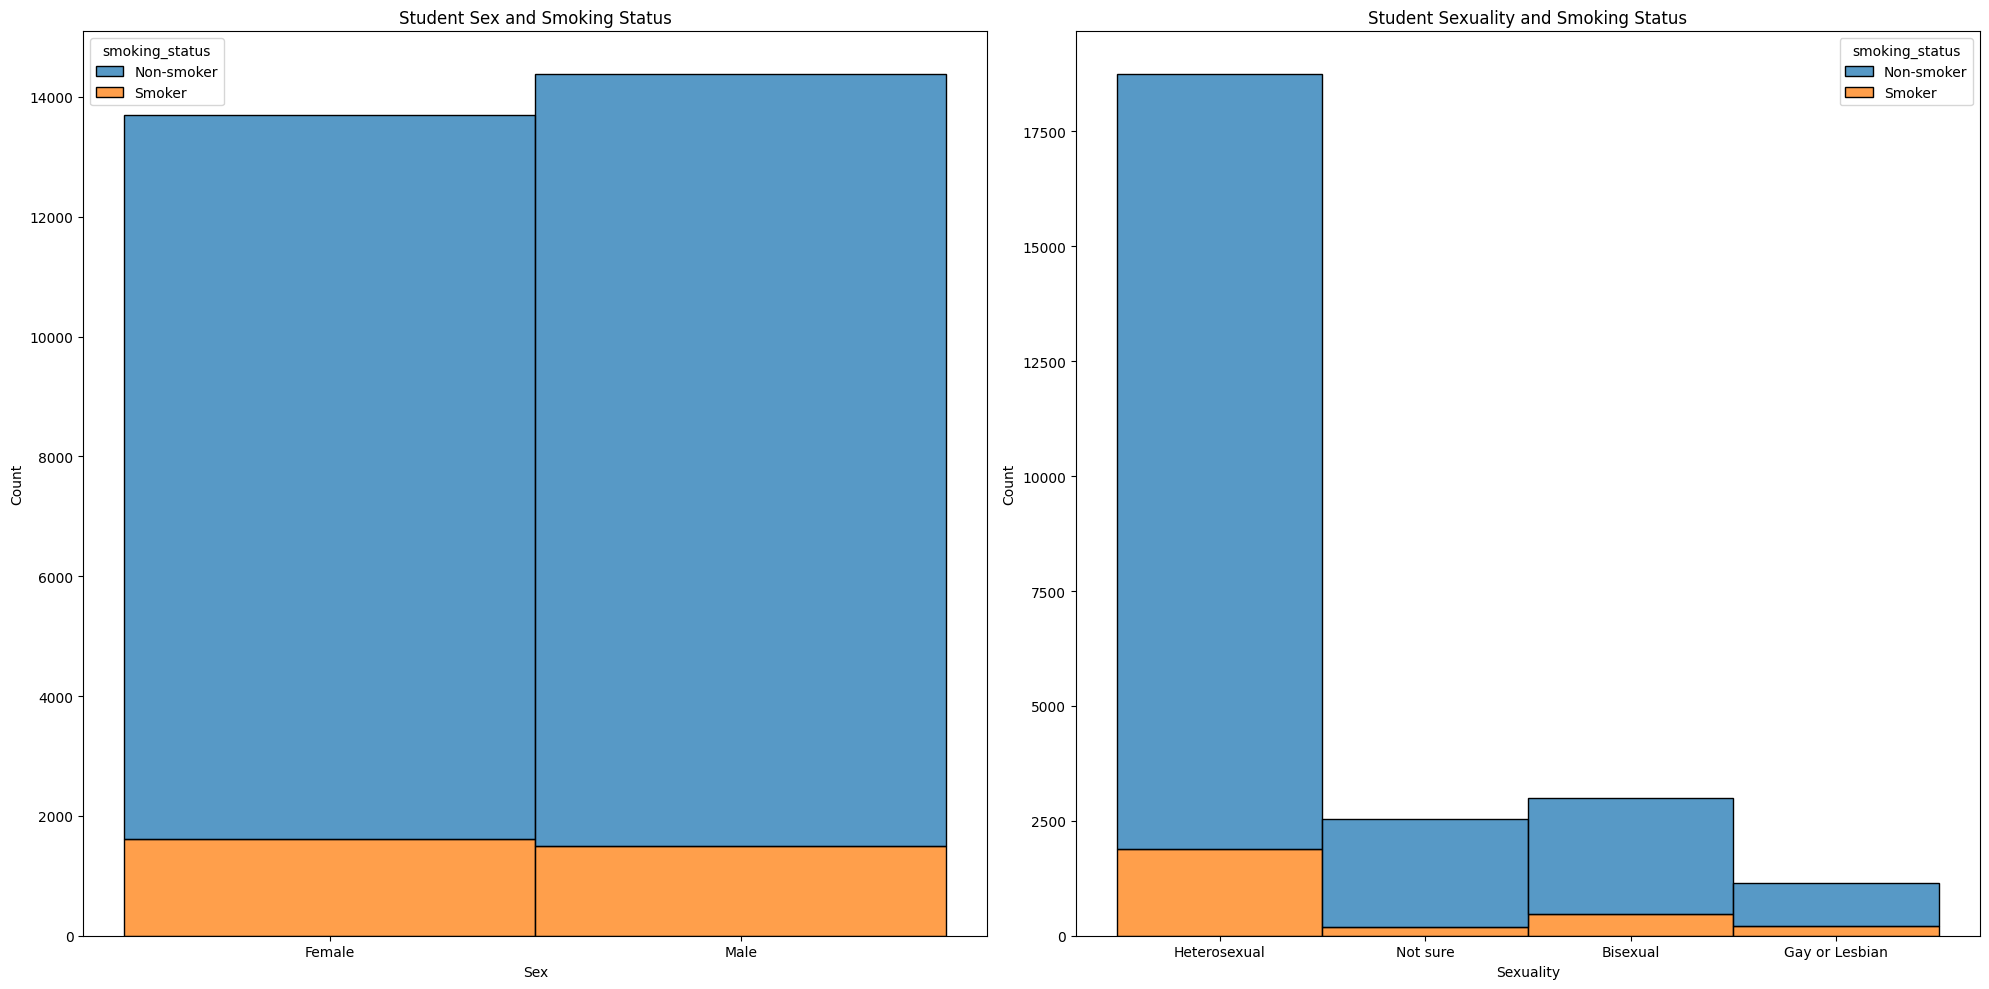

In [26]:
# Visualizing the distributions of the sexuality of youths and the sex of youths with respect to smoking_status
# Visualizing the imbalance in smoking_status classes. 

fig, axes = plt.subplots(1, 2, figsize=(20,10))
sns.histplot(data = replaced_data, x = 'Sex', hue = 'smoking_status', multiple = 'stack', ax = axes[0])
sns.histplot(data = replaced_data, x = 'Sexuality', hue = 'smoking_status', multiple = 'stack', ax = axes[1])

axes[0].set_title('Student Sex and Smoking Status')
axes[1].set_title('Student Sexuality and Smoking Status')

plt.tight_layout()
plt.show()

In [27]:
# Here, we split the replaced_data into smoker data and non-smoker data for further data cleaning and pre processing. 
non_smoker_df = pd.DataFrame(replaced_data[replaced_data['smoking_status']=='Non-smoker'])
smoker_df = pd.DataFrame(replaced_data[replaced_data['smoking_status']=='Smoker'])

# Now we can impute the data specific to smokers and non-smokers without the majority class affecting the others' imputation

In [28]:
non_smoker_df.describe()

,Age,Mexican_Origin,Puerto_Rican,Cuban,Other_Hispanic_Origin,Native_American,Asian,Black,Pacific_Islander,White,30-D_Freq,30-D_Cravings,cig_smoker_students_10Count,e-cig_smoker_students_10Count,7-D_home_tobacco_usage,7-D_vehicle_tobacco_usage
count,25066.000000,25161.000000,25161.000000,25161.000000,25161.000000,25161.000000,25161.000000,25161.000000,25161.000000,25161.000000,25161.0,25161.0,23640.000000,23594.000000,22908.000000,22832.000000
mean,14.407444,0.155757,0.023131,0.007353,0.102659,0.109654,0.103215,0.182226,0.032034,0.607051,0.0,0.0,2.755880,4.019200,0.905884,0.575289
std,1.998401,0.362632,0.150323,0.085433,0.303519,0.312464,0.304246,0.386039,0.176093,0.488415,0.0,0.0,2.943093,3.255286,2.100989,1.572292
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000
50%,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,2.000000,4.000000,0.000000,0.000000
75%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,4.000000,7.000000,0.000000,0.000000
max,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,10.000000,10.000000,7.000000,7.000000


In [29]:
smoker_df.describe()

,Age,Mexican_Origin,Puerto_Rican,Cuban,Other_Hispanic_Origin,Native_American,Asian,Black,Pacific_Islander,White,30-D_Freq,30-D_Cravings,cig_smoker_students_10Count,e-cig_smoker_students_10Count,7-D_home_tobacco_usage,7-D_vehicle_tobacco_usage
count,3125.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,2531.000000,3086.000000,2907.000000,2910.000000,2733.000000,2716.000000
mean,15.557120,0.144409,0.027157,0.014058,0.093930,0.153355,0.052716,0.202236,0.035144,0.649840,10.721454,0.276086,4.003096,6.538144,2.278449,2.022459
std,1.879284,0.351560,0.162565,0.117747,0.291778,0.360387,0.223501,0.401732,0.184173,0.477096,11.839283,0.447132,3.402307,2.993936,2.887920,2.590792
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000
50%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,7.000000,0.000000,0.000000
75%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000,1.000000,7.000000,9.000000,5.000000,4.000000
max,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,10.000000,10.000000,7.000000,7.000000


In [30]:
smoker_df.isna().sum()

Age                                                 5
Sex                                                20
Mexican_Origin                                      0
Puerto_Rican                                        0
Cuban                                               0
Other_Hispanic_Origin                               0
Native_American                                     0
Asian                                               0
Black                                               0
Pacific_Islander                                    0
White                                               0
30-D_Freq                                         599
30-D_Cravings                                      44
When_after_waking                                  52
Thinking_about_quitting                           353
12-M_tobacco_stoppage_freq                        395
30-D_sale_refusal_by_age                           79
store_tobacco_access                              103
online_tobacco_access       

In [31]:
non_smoker_df.isna().sum()

Age                                                 95
Sex                                                204
Mexican_Origin                                       0
Puerto_Rican                                         0
Cuban                                                0
Other_Hispanic_Origin                                0
Native_American                                      0
Asian                                                0
Black                                                0
Pacific_Islander                                     0
White                                                0
30-D_Freq                                            0
30-D_Cravings                                        0
When_after_waking                                    0
Thinking_about_quitting                              0
12-M_tobacco_stoppage_freq                           0
30-D_sale_refusal_by_age                             0
store_tobacco_access                               787
online_tob

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
smoker_transformed_data = imputer.fit_transform(smoker_df)

In [33]:
smoker_transformed_df = pd.DataFrame(smoker_transformed_data, columns = smoker_df.columns)

In [34]:
non_smoker_transformed = imputer.fit_transform(non_smoker_df)
non_smoker_transformed_df = pd.DataFrame(non_smoker_transformed, columns = non_smoker_df.columns)

In [35]:
imputed_data = pd.concat([smoker_transformed_df, non_smoker_transformed_df])
# Since the new merged data set will have distinct, 2 separable classes, the dataset will be shuffled. 
clean_data = imputed_data.sample(frac=1, random_state = 999999).reset_index(drop=True)

In [36]:
clean_data.head()

,Age,Sex,Mexican_Origin,Puerto_Rican,Cuban,Other_Hispanic_Origin,Native_American,Asian,Black,Pacific_Islander,...,Feeling_depressed,Feeling_anxious,uncontrollable_worrying,Family_owns_vehicle,Own_bedroom,Num_of_tech_consoles,12-M_vacation_freq,12-M_grades,Difficulty_concentrating_remembering_decisions,smoking_status
0,13.0,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not at all,Not at all,Not at all,Yes_two_plus,Yes,More than two,More than twice,Ave_A,No,Non-smoker
1,12.0,Female,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Not at all,Not at all,Not at all,Yes_two_plus,No,More than two,More than twice,Ave_A,No,Non-smoker
2,16.0,Male,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Not at all,Not at all,Not at all,No,No,None,Not at all,Not sure,No,Non-smoker
3,12.0,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not at all,Not at all,Not at all,Yes_two_plus,No,More than two,More than twice,Ave_A,No,Non-smoker
4,14.0,Female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,More than half the days,Nearly every day,Nearly every day,Yes_two_plus,No,More than two,More than twice,Ave_A,Yes,Non-smoker


In [37]:
clean_data.shape

(28291, 57)

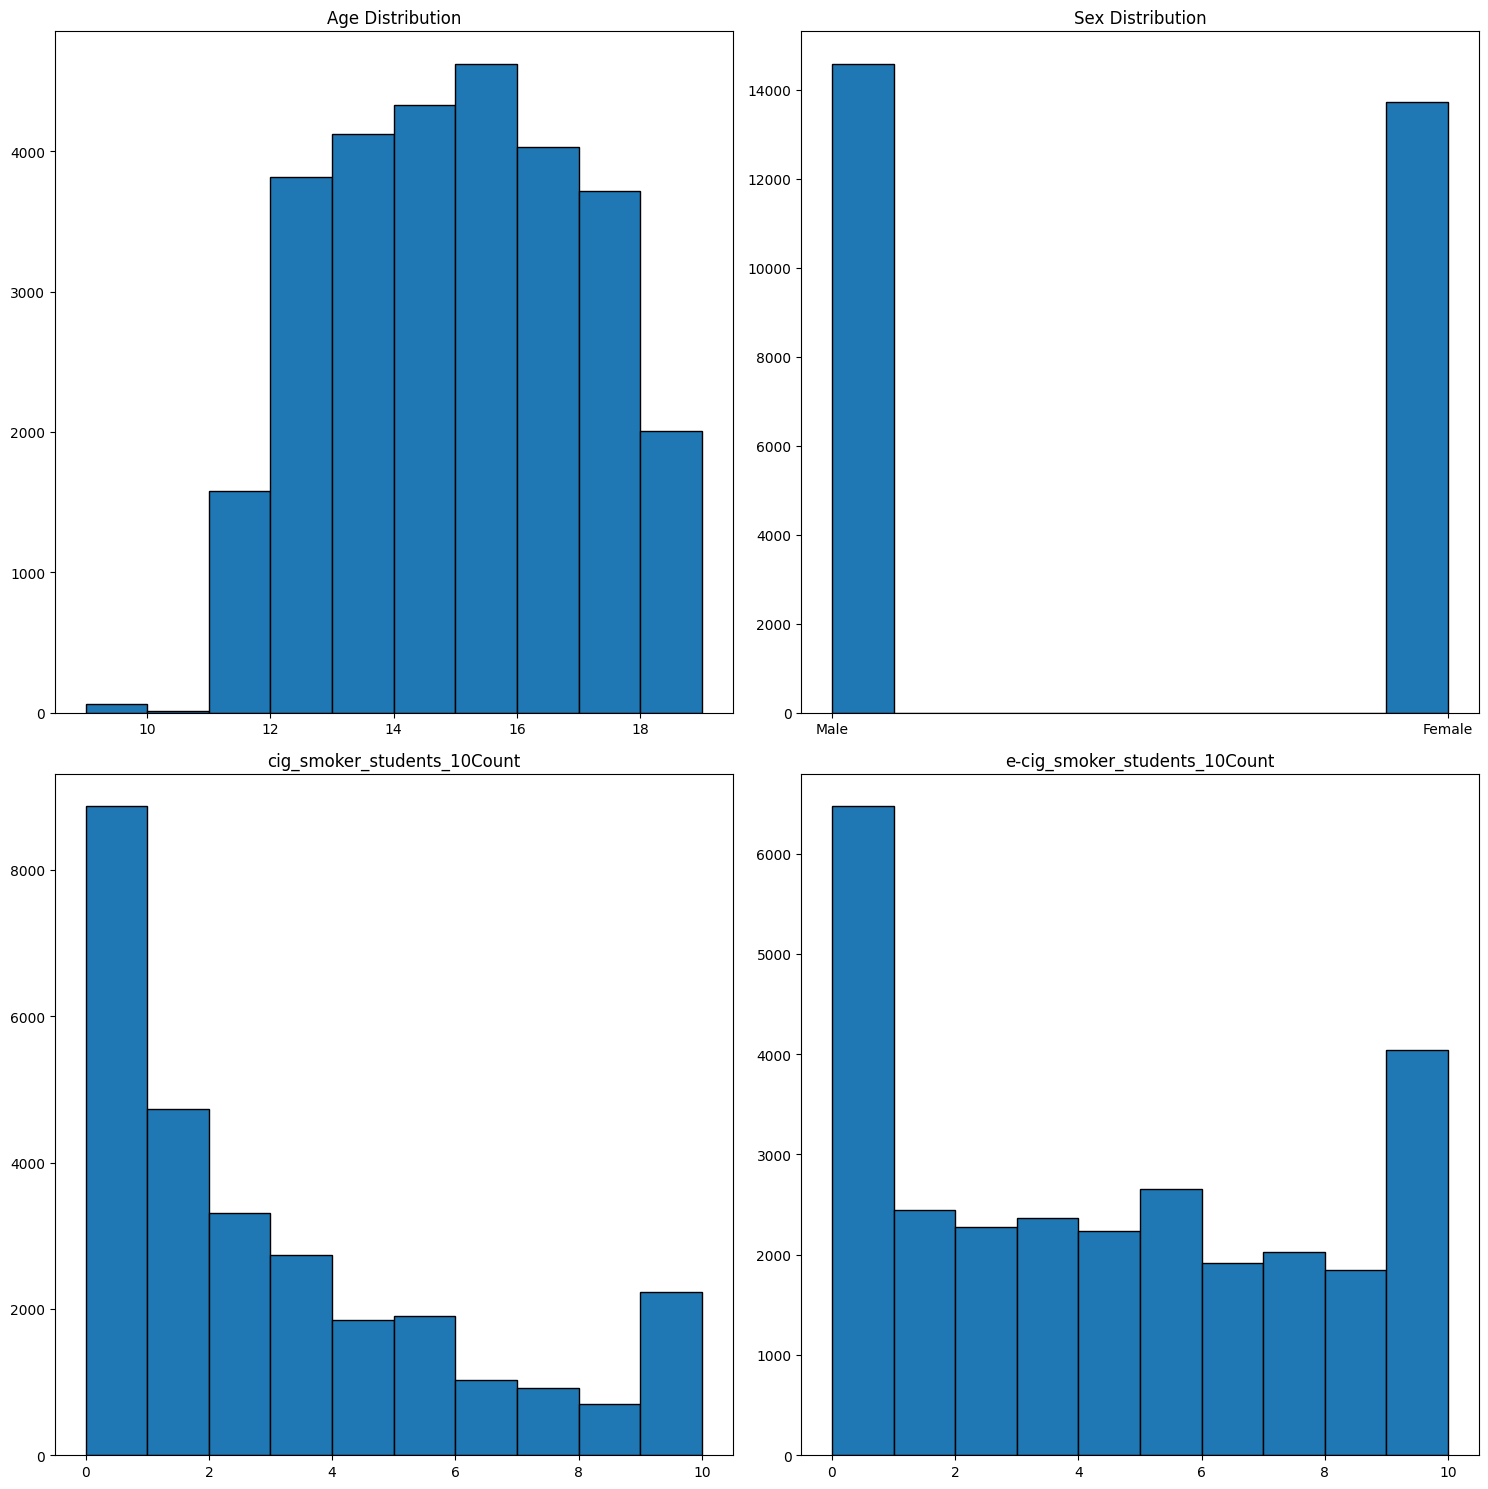

In [38]:
# Plot distributions to show imbalance between smokers and non-smokers. 
# Plot 30 Day Frequency distributions.

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

axes[0, 0].hist(data=clean_data, x='Age', edgecolor='Black', bins=10)
axes[0, 1].hist(data=clean_data, x='Sex', edgecolor='Black', bins=10)
axes[1, 0].hist(data=clean_data, x='cig_smoker_students_10Count', bins=10, edgecolor='Black')
axes[1, 1].hist(data=clean_data, x='e-cig_smoker_students_10Count', bins=10, edgecolor='Black')

axes[0, 0].set_title('Age Distribution')
axes[0, 1].set_title('Sex Distribution')
axes[1, 0].set_title('cig_smoker_students_10Count')
axes[1, 1].set_title('e-cig_smoker_students_10Count')

plt.tight_layout()
plt.show()

## Encoding 'clean_data' and data transformation

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import OrdinalEncoder

le = LabelEncoder()
ohe = OneHotEncoder(sparse_output = False, drop = 'first')
binary = Binarizer()
oe = OrdinalEncoder()

### One Hot Encoding

In [40]:
clean_predictors = clean_data.drop('smoking_status', axis = 1)
clean_target = clean_data['smoking_status']

In [41]:
# Dropping columns that have direct colinearity with smoking status
col_to_drop = ['When_after_waking', '30-D_Freq', 'Thinking_about_quitting',
                              '12-M_tobacco_stoppage_freq', '30-D_sale_refusal_by_age', '30-D_Cravings']
for column in col_to_drop:
    if column in clean_predictors.columns:
        clean_predictors = clean_predictors.drop(columns = column, axis =1)

clean_predictors.shape # Should print (28291, 50)

(28291, 50)

In [42]:
# Making sure that numerical features contain 'int' data type. 

clean_predictors[['Age', 'cig_smoker_students_10Count', 'e-cig_smoker_students_10Count']] = clean_predictors[['Age', 'cig_smoker_students_10Count', 'e-cig_smoker_students_10Count']].astype(int)
clean_predictors[['7-D_home_tobacco_usage', '7-D_vehicle_tobacco_usage']] = clean_predictors[['7-D_home_tobacco_usage', '7-D_vehicle_tobacco_usage']].astype(int)

In [43]:
# Converting Dataset into One-Hot Encoded Dataset. 
# There are currently columns that are technically already one hot encoded, so we will drop them. 
# FIrst, the clean_predictors dataset will be copied into a different party. 

ohe_predictors = clean_predictors.copy()
ohe_predictors_wo_race = ohe_predictors.drop(columns = ['Mexican_Origin', 'Puerto_Rican', 'Cuban', 'Other_Hispanic_Origin', 
               'Native_American', 'Asian', 'Black', 'Pacific_Islander', 'White'], axis = 1)

ohe_encoded_data = ohe_predictors[['Mexican_Origin', 'Puerto_Rican', 'Cuban', 'Other_Hispanic_Origin', 
               'Native_American', 'Asian', 'Black', 'Pacific_Islander', 'White']]

encoded_data = ohe.fit_transform(ohe_predictors_wo_race)
feature_names = ohe.get_feature_names_out()
lowercase_feature_names = [name.casefold() for name in feature_names]

encoded_df = pd.DataFrame(encoded_data, columns=lowercase_feature_names)

ohe_encoded_df = pd.concat([ohe_encoded_data, encoded_df], axis=1)

### Label Encoding

In [45]:
clean_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28291 entries, 0 to 28290
Data columns (total 50 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Age                                             28291 non-null  int64 
 1   Sex                                             28291 non-null  object
 2   Mexican_Origin                                  28291 non-null  object
 3   Puerto_Rican                                    28291 non-null  object
 4   Cuban                                           28291 non-null  object
 5   Other_Hispanic_Origin                           28291 non-null  object
 6   Native_American                                 28291 non-null  object
 7   Asian                                           28291 non-null  object
 8   Black                                           28291 non-null  object
 9   Pacific_Islander                                28

In [46]:
clean_predictors[['Mexican_Origin', 'Puerto_Rican', 'Cuban', 'Other_Hispanic_Origin', 'Native_American', 'Asian', 'Black', 'Pacific_Islander', 'White']] = clean_predictors[['Mexican_Origin', 'Puerto_Rican', 'Cuban', 'Other_Hispanic_Origin', 'Native_American', 'Asian', 'Black', 'Pacific_Islander', 'White']].astype(int)

In [47]:
clean_predictors[['cig_smoker_students_10Count', 'e-cig_smoker_students_10Count']] = clean_predictors[['cig_smoker_students_10Count', 'e-cig_smoker_students_10Count']].astype(int)
clean_predictors[['7-D_home_tobacco_usage', '7-D_vehicle_tobacco_usage']] = clean_predictors[['7-D_home_tobacco_usage', '7-D_vehicle_tobacco_usage']].astype(int)
clean_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28291 entries, 0 to 28290
Data columns (total 50 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Age                                             28291 non-null  int64 
 1   Sex                                             28291 non-null  object
 2   Mexican_Origin                                  28291 non-null  int64 
 3   Puerto_Rican                                    28291 non-null  int64 
 4   Cuban                                           28291 non-null  int64 
 5   Other_Hispanic_Origin                           28291 non-null  int64 
 6   Native_American                                 28291 non-null  int64 
 7   Asian                                           28291 non-null  int64 
 8   Black                                           28291 non-null  int64 
 9   Pacific_Islander                                28

In [48]:
cat_data = clean_predictors.select_dtypes('object')

label_encoders = {}

for column in cat_data:
    le = LabelEncoder()
    le.fit(clean_predictors[column])
    label_encoders[column] = le

for column in cat_data:
    clean_predictors[column] = label_encoders[column].transform(clean_predictors[column])

In [49]:
clean_data = pd.concat([clean_predictors, clean_target], axis = 1)

## Fixing class-imbalance issues

In [50]:
!pip install imbalanced-learn

In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=999999)
x_resampled, y_resampled = smote.fit_resample(clean_predictors, clean_target)

In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 999999)
ohe_x_resampled, ohe_y_resampled = smote.fit_resample(ohe_encoded_df, clean_target)

In [53]:
# ohe_x_resampled.to_csv("data/ohe_x_resampled.csv")
# ohe_y_resampled.to_csv("data/ohe_y_resampled.csv")

### Dimensionality Reduction

In [54]:
# X_high_dim = pd.read_csv("data/ohe_x_resampled.csv")
# X_high_dim.drop(columns = ['Unnamed: 0'], axis =1, inplace = True)

# X_high_dim.shape - should return (50321, 166)

###### No need to run KPCA on **one-hot encoded data** anymore since we will be saving and loading reduced data as a .csv file.

In [55]:
# kpca_high_dim = KernelPCA()  
# X_kpca_high_dim = kpca_high_dim.fit_transform(X_high_dim)
# pd.DataFrame(X_kpca_high_dim).to_csv("data/X_kpca_high_dim.csv", index = False)

In [56]:
X_kpca_high_dim = pd.read_csv("data/X_kpca_high_dim.csv")
np.array(X_kpca_high_dim)

array([[ 2.06008290e+00, -4.09490110e-01, -5.31943865e-01, ...,
         3.22708302e-03,  3.44417734e-03, -1.67417203e-04],
       [-8.77546149e-01, -1.98146065e+00,  7.44542622e-02, ...,
         4.73467969e-03, -5.65822802e-03,  7.44924629e-04],
       [ 2.59160455e+00, -6.72980193e-01,  9.39257087e-01, ...,
        -1.67275849e-03, -2.76202834e-02,  9.64252604e-03],
       ...,
       [-1.43479061e-01,  1.70538276e+00,  1.08073454e-01, ...,
         7.70474497e-03,  4.83007386e-05, -1.49624766e-04],
       [-1.13798760e+00, -1.00280081e+00,  1.01070489e-02, ...,
         4.19731054e-03,  4.70796700e-04, -1.22987282e-04],
       [ 2.14812576e+00,  3.88846067e-01, -7.56626990e-01, ...,
         6.55486835e-02, -9.46136548e-03,  4.54084839e-03]])

Variance Explained per Principal Component: 0      0.090549
1      0.074387
2      0.044176
3      0.032292
4      0.028392
         ...   
161    0.000157
162    0.000096
163    0.000075
164    0.000026
165    0.000012
Length: 166, dtype: float64


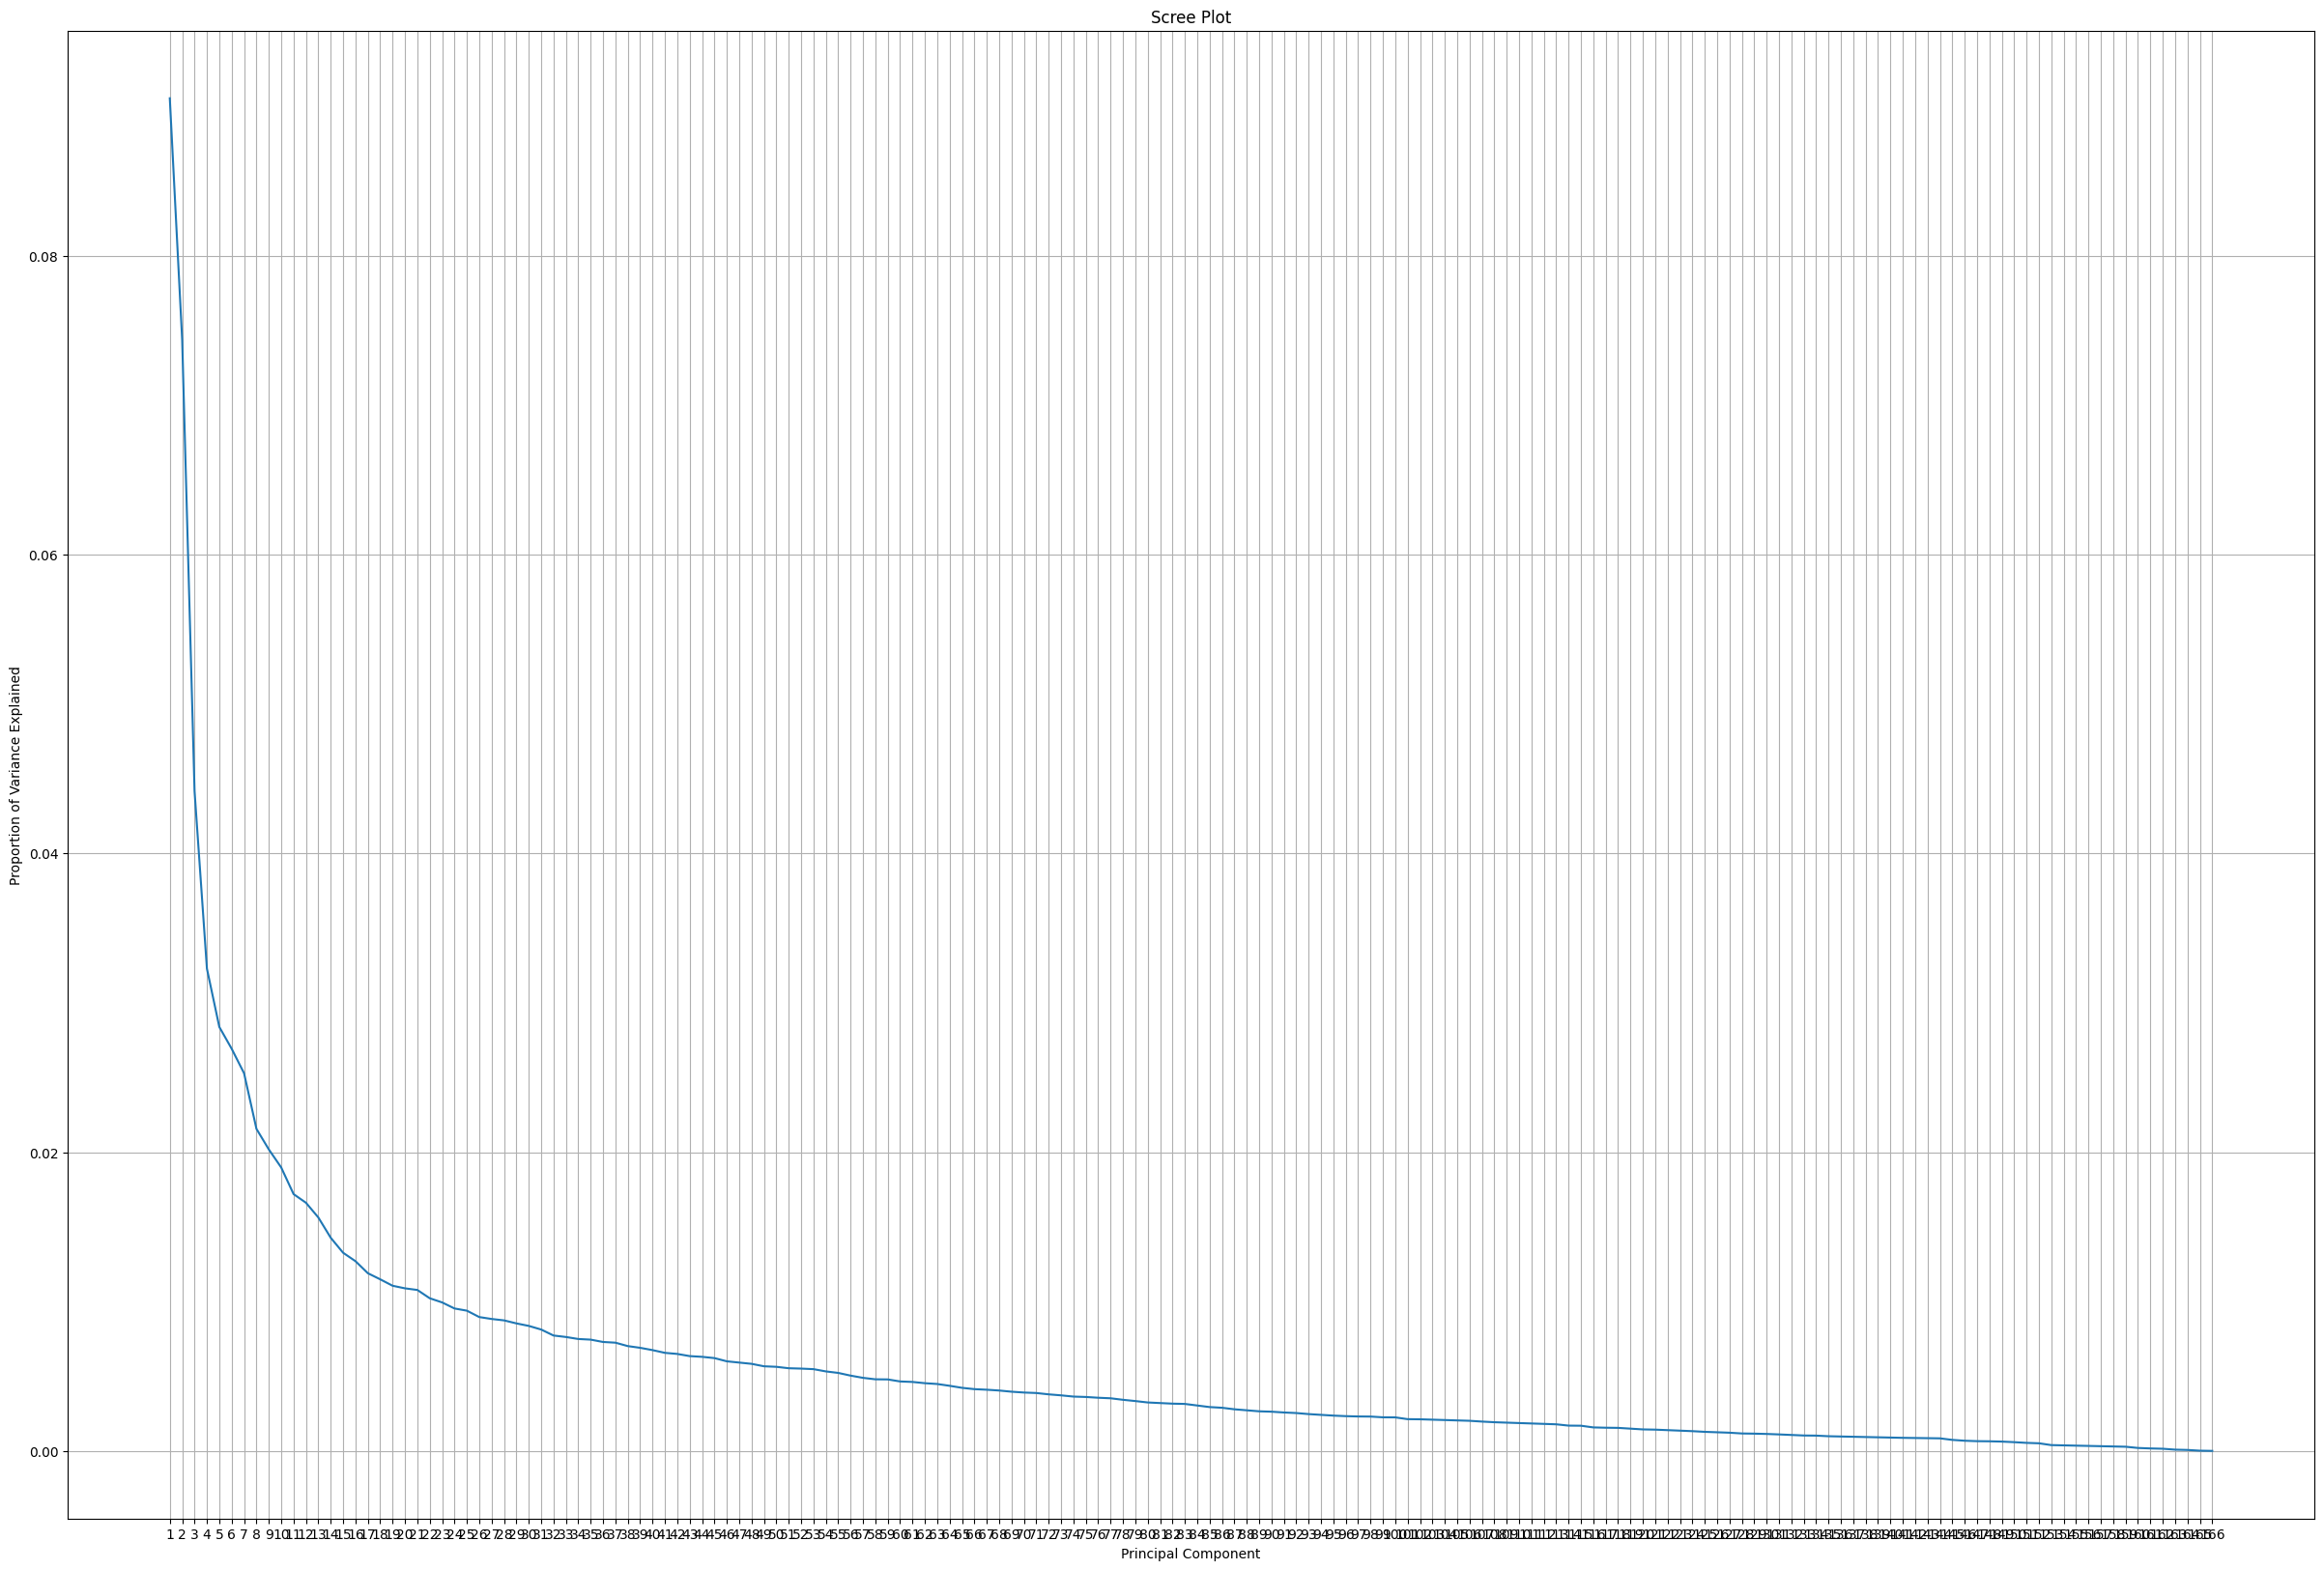

In [57]:
variance_explained = np.var(X_kpca_high_dim, axis=0) / np.sum(np.var(X_kpca_high_dim, axis=0))
print("Variance Explained per Principal Component:", variance_explained)


plt.figure(figsize=(30, 20))
plt.plot(range(1, len(variance_explained) + 1), variance_explained.values)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.xticks(range(1, len(variance_explained) + 1))
plt.grid()
plt.show()

In [58]:
var_diff = {}

for i in range(len(variance_explained)):
    if i == 0:
        var_diff[i] = variance_explained[i] - variance_explained[i]
    else:
        var_diff[i] = np.abs(variance_explained[i] - variance_explained[i-1])

var_diff = pd.DataFrame(var_diff, index=[0])
var_diff = var_diff.values

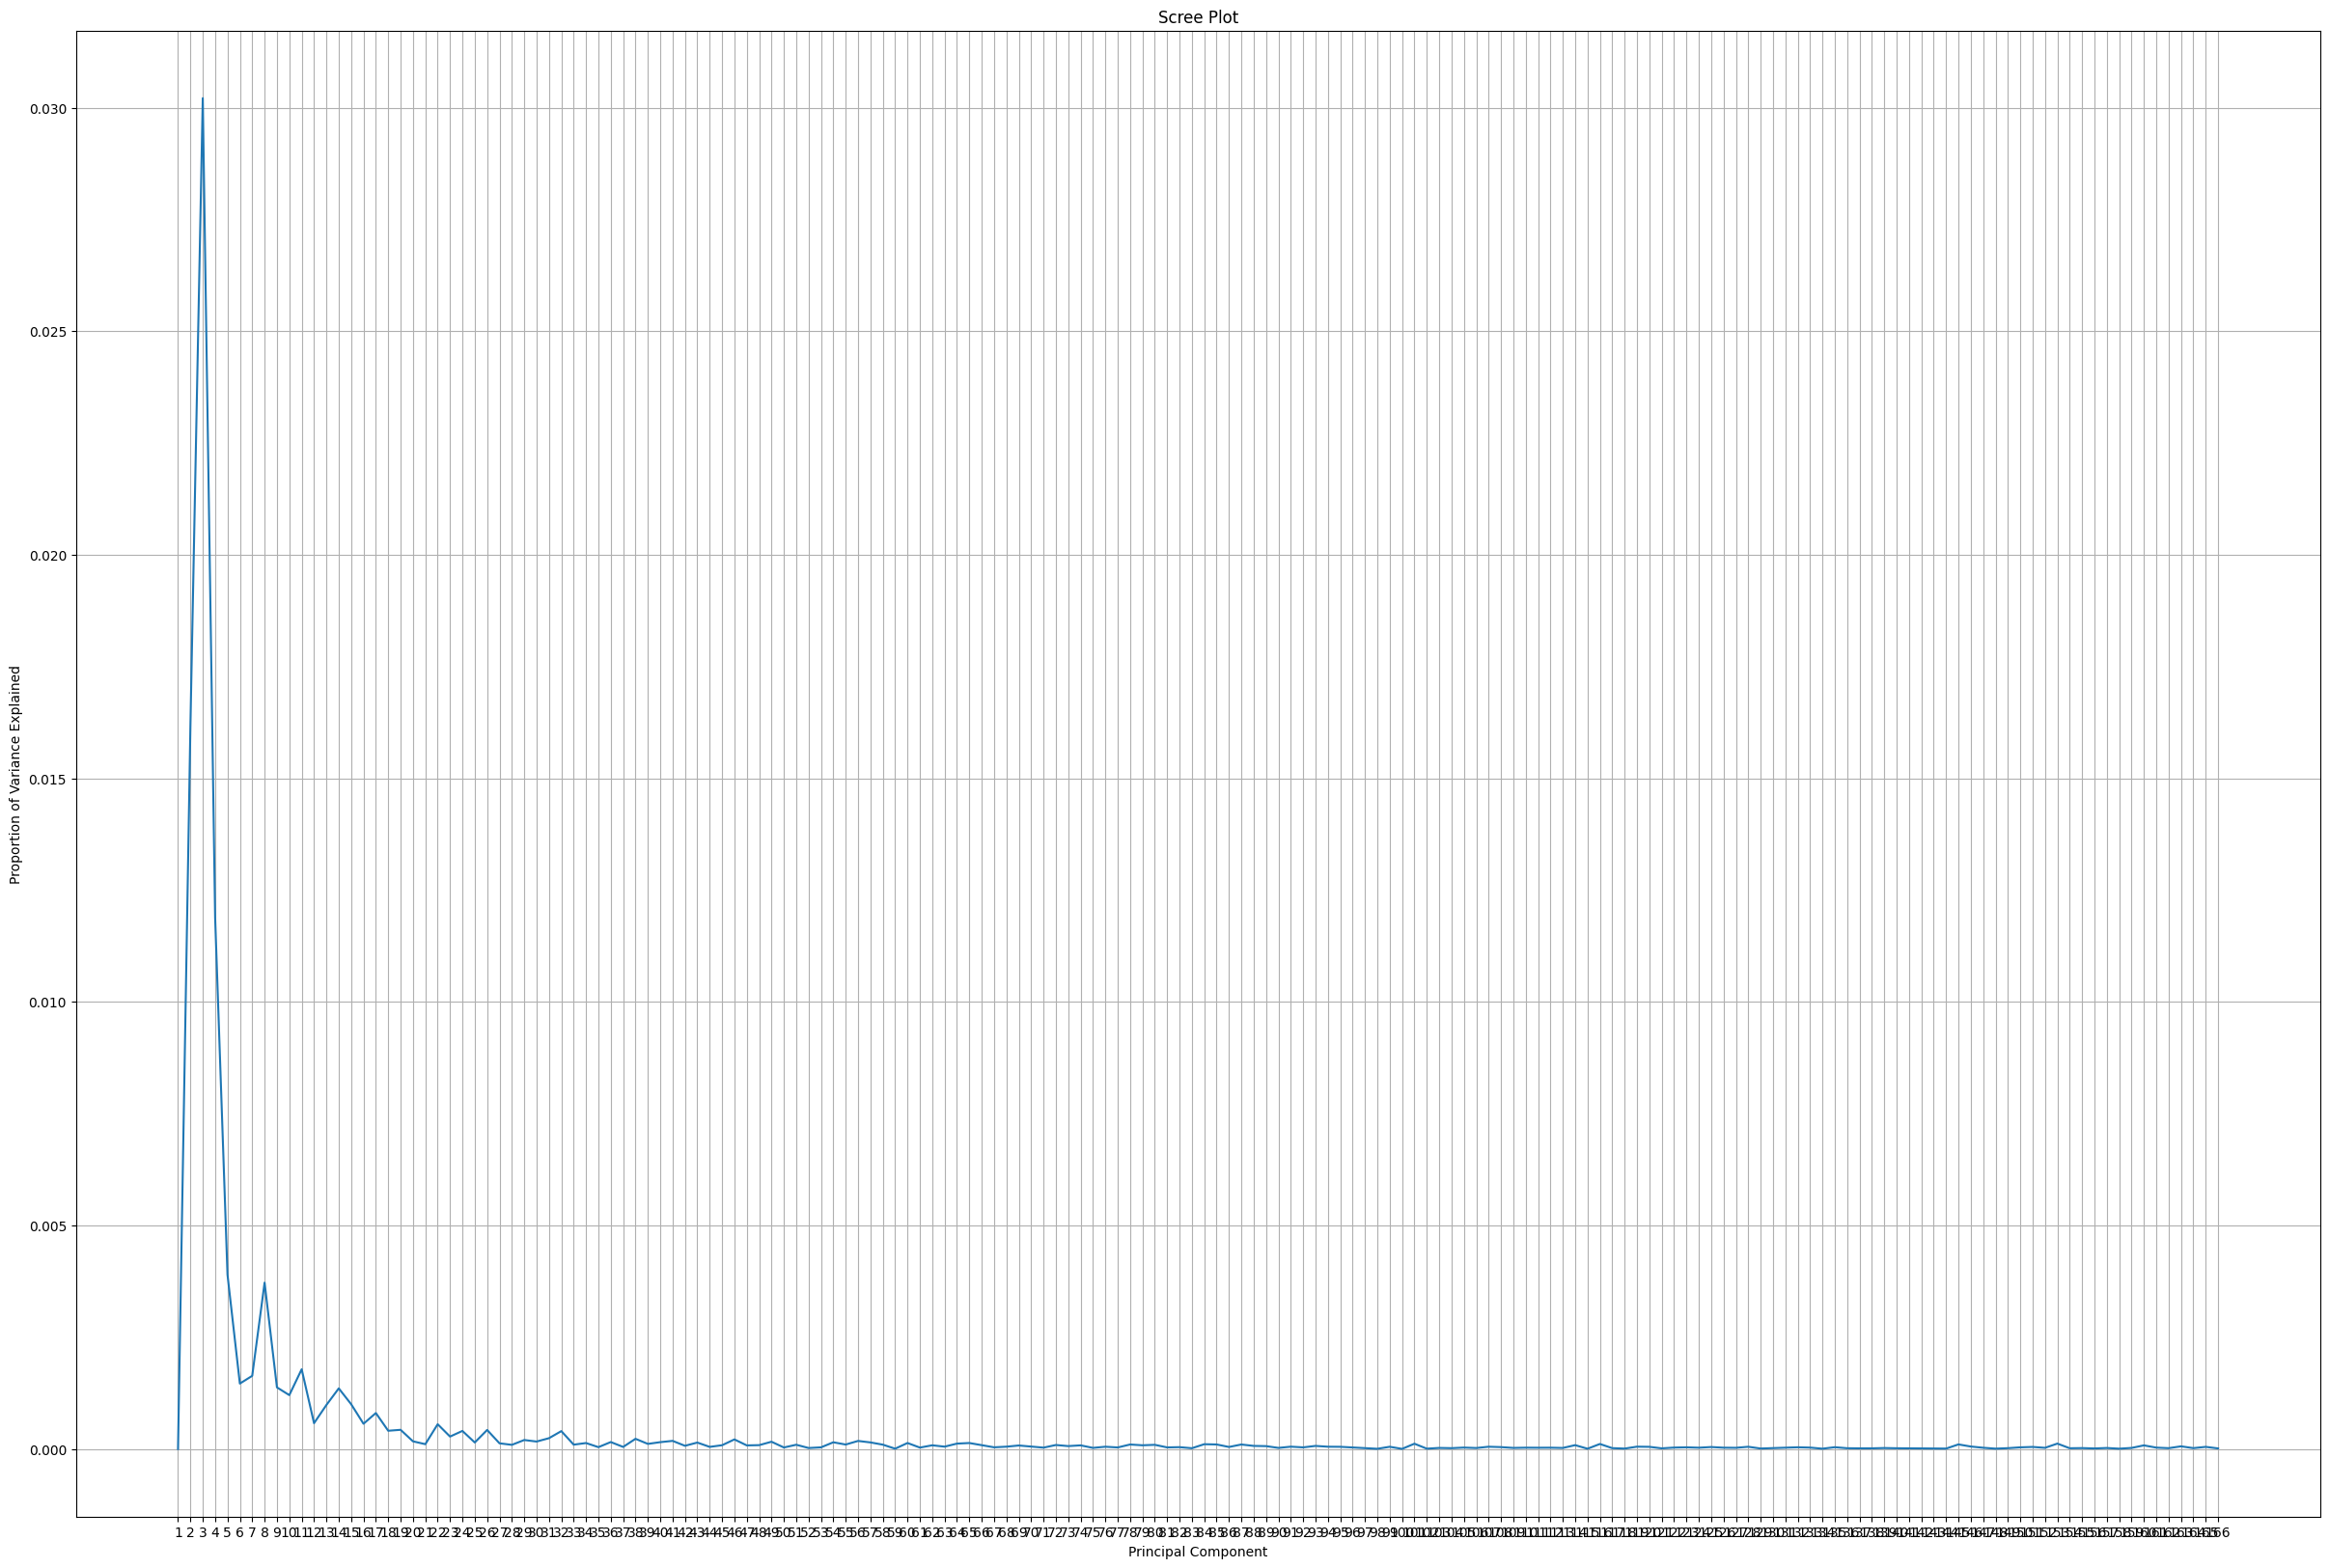

In [59]:
# Plotting to see where the variance starts to level out by calculating slope. 

plt.figure(figsize=(30, 20))
plt.plot(range(1, len(var_diff[0]) + 1), var_diff[0], )
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.xticks(range(1, len(var_diff[0]) + 1))
plt.grid()
plt.show()

## Model Building

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [61]:
logreg = LogisticRegression(solver = 'sag', penalty = 'l2', max_iter = 250)
dtree = DecisionTreeClassifier(criterion = "gini")
rfc = RandomForestClassifier(n_estimators = 200, criterion = "gini", random_state = 999999)
cls = [logreg, dtree, rfc]

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

cv_X_train, cv_X_test, cv_y_train, cv_y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

cv_model = RandomForestClassifier(criterion = "gini", random_state = 999999)

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None]
}

grid_search = GridSearchCV(cv_model, param_grid, cv=3, scoring='accuracy')

grid_search.fit(cv_X_train, cv_y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(cv_X_test)
print(classification_report(cv_y_test, y_pred))

              precision    recall  f1-score   support

  Non-smoker       0.95      0.95      0.95      5061
      Smoker       0.95      0.95      0.95      5004

    accuracy                           0.95     10065
   macro avg       0.95      0.95      0.95     10065
weighted avg       0.95      0.95      0.95     10065



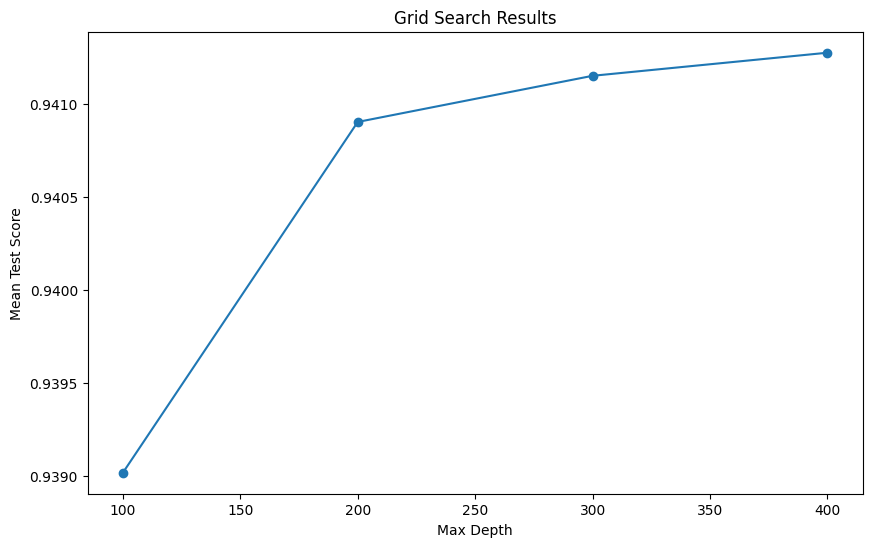

In [70]:
results = pd.DataFrame(grid_search.cv_results_)

cols = ['param_n_estimators', 'param_max_depth', 'mean_test_score']
all_results = results[cols].values
x_results = results['param_n_estimators'].values
y_results = results['mean_test_score'].values

# Plotting mean test scores against the other hyperparameter (param_max_depth)
plt.figure(figsize=(10, 6))
plt.plot(x_results, y_results, marker='o')
plt.title('Grid Search Results')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.show()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state = 999999)

def model_eval(cls, X_training_data, y_training_data):
    cv_score = {}
    for i in cls:
        cv_score[i] = np.mean(cross_val_score(i, X_training_data, y_training_data, cv = 3, scoring = 'f1_macro')) 
    return cv_score
    
model_eval(cls, X_train, y_train)

{LogisticRegression(max_iter=250, solver='sag'): 0.8726061319028541,
 DecisionTreeClassifier(): 0.879064687559862,
 RandomForestClassifier(n_estimators=200, random_state=999999): 0.9391612438365976}

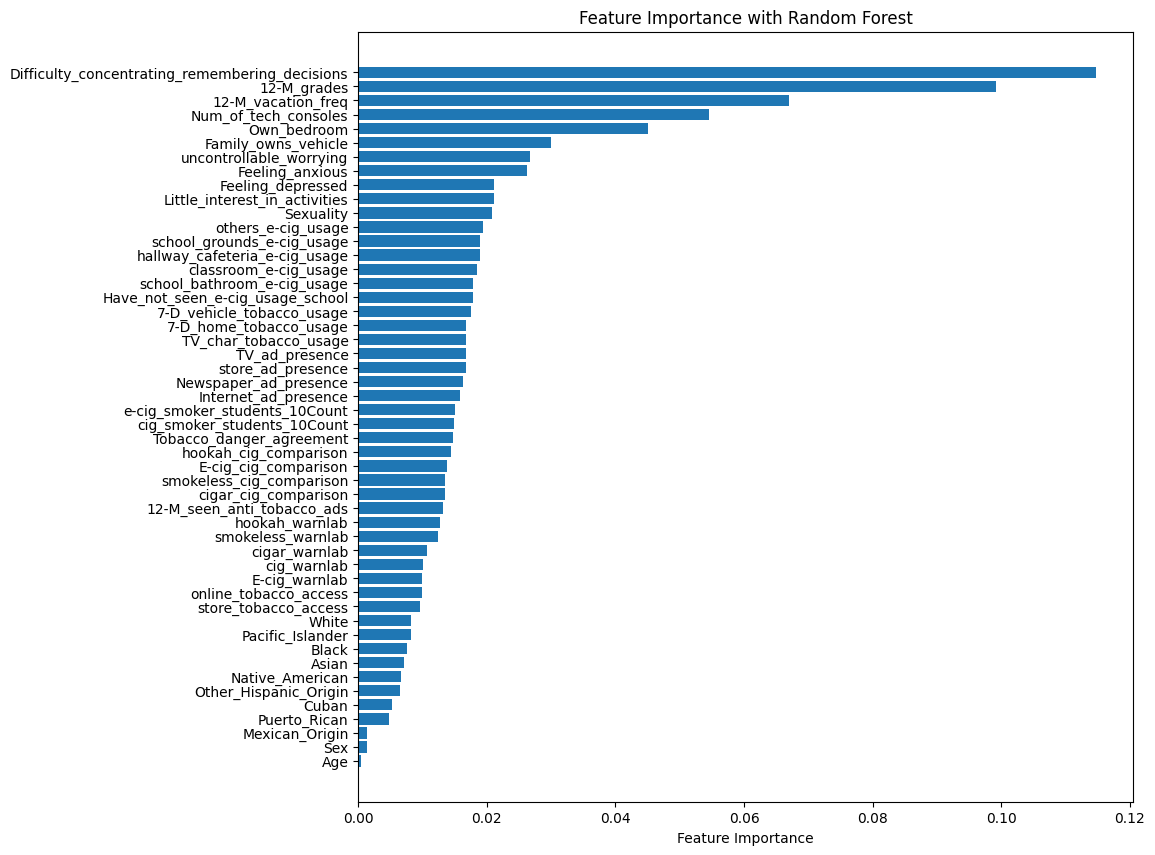

In [89]:
model = rfc.fit(X_train, y_train)
importances = rfc.feature_importances_

sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.barh(range(X_train.shape[1]), importances[sorted_idx], align='center')
plt.yticks(range(X_train.shape[1]), X_train.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance with Random Forest')
plt.show()

In [73]:
# This code block takes over 2 hours to run

feature_importance_wrt_cvscore = []

for column in X_train.columns:
    cv_score_wo_col = np.mean(cross_val_score(rfc, X_train.drop(columns = column, axis = 1), 
                                      y_train, cv = 3, scoring = 'f1_macro'))
    feature_importance_wrt_cvscore.append(cv_score_wo_col)

In [74]:
#unable to save to csv file due to kernel crashing despite running for over 2 hours. 

cv_score_minus_col = pd.DataFrame(feature_importance_wrt_cvscore, X_train.columns)
cv_score_minus_col.to_csv("data/cv_score_minus_col.csv")
cv_score_minus_col.sort_values(by = [0], ascending = False)

In [90]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

accuracy

0.9496274217585693

In [76]:
ohe_X_train, ohe_X_test, y_train, y_test = train_test_split(ohe_x_resampled, ohe_y_resampled, test_size = 0.2, random_state = 999999)

def ohe_model_eval(cls, X_training_data, y_training_data):
    ohe_cv_score = {}
    for i in cls:
        ohe_cv_score[i] = np.mean(cross_val_score(i, X_training_data, y_training_data, cv = 3, scoring = 'f1_macro')) 
    return ohe_cv_score
    
ohe_model_eval(cls, ohe_X_train, y_train)

{LogisticRegression(max_iter=250, solver='sag'): 0.8363221183231212,
 DecisionTreeClassifier(): 0.9087843091951305,
 RandomForestClassifier(n_estimators=200, random_state=999999): 0.9558821073618108}

In [77]:
from sklearn.metrics import accuracy_score

ohe_model = rfc.fit(ohe_X_train, y_train)
ohe_y_pred = ohe_model.predict(ohe_X_test)
ohe_accuracy = accuracy_score(ohe_y_pred, y_test)

ohe_accuracy

0.9573770491803278

## Model Validation

In [78]:
import joblib
joblib.dump(model, "tobacco_pred_model.pk1")

['tobacco_pred_model.pk1']

In [79]:
# Validation conducted below using either "tobacco_pred_model.pk1" or model.predict(). 

In [80]:
survey_data = pd.read_csv("data/Tobacco Survey (Responses) - Form Responses 1.csv")
survey_data.drop(columns = "Timestamp", axis = 1, inplace = True)

In [81]:
survey_col = survey_data.columns
new_col_renames = {survey_col[0]:"Age", survey_col[1]:'Sex', survey_col[2]:'Mexican_Origin', survey_col[3]:'Puerto_Rican', survey_col[4]:'Cuban', survey_col[5]:'Other_Hispanic_Origin', 
               survey_col[6]:'Native_American', survey_col[7]:'Asian', survey_col[8]:'Black', survey_col[9]:'Pacific_Islander', survey_col[10]:'White', 
               survey_col[11]:'store_tobacco_access', 
               survey_col[12]:'online_tobacco_access', survey_col[13]:'E-cig_warnlab', survey_col[14]:'cig_warnlab', survey_col[15]:'cigar_warnlab', 
               survey_col[16]:'smokeless_warnlab', survey_col[17]:'hookah_warnlab', survey_col[18]:'12-M_seen_anti_tobacco_ads', survey_col[19]:'cigar_cig_comparison', 
               survey_col[20]:'smokeless_cig_comparison', survey_col[21]:'E-cig_cig_comparison', survey_col[22]:'hookah_cig_comparison',
               survey_col[23]:'Tobacco_danger_agreement', survey_col[24]:'cig_smoker_students_10Count', survey_col[25]:'e-cig_smoker_students_10Count', 
               survey_col[26]:'Internet_ad_presence', survey_col[27]:'Newspaper_ad_presence', survey_col[28]:'store_ad_presence', survey_col[29]:'TV_ad_presence', 
               survey_col[30]:'TV_char_tobacco_usage', survey_col[31]:'7-D_home_tobacco_usage', survey_col[32]:'7-D_vehicle_tobacco_usage', survey_col[33]:'Have_not_seen_e-cig_usage_school', 
               survey_col[34]:'school_bathroom_e-cig_usage', survey_col[35]:'classroom_e-cig_usage', 
               survey_col[36]:'hallway_cafeteria_e-cig_usage', survey_col[37]:'school_grounds_e-cig_usage', survey_col[38]:'others_e-cig_usage', 
               survey_col[39]:'Sexuality', survey_col[40]:'Little_interest_in_activities', survey_col[41]:'Feeling_depressed', survey_col[42]:'Feeling_anxious', 
               survey_col[43]:'uncontrollable_worrying', survey_col[44]:'Family_owns_vehicle', survey_col[45]:'Own_bedroom', survey_col[46]:'Num_of_tech_consoles', 
               survey_col[47]:'12-M_vacation_freq', survey_col[48]:'12-M_grades', survey_col[49]:'Difficulty_concentrating_remembering_decisions'}

In [82]:
survey_data.rename(columns=new_col_renames, inplace=True)
survey_data_X = survey_data.drop(columns = 'smoking_status', axis = 1)
survey_data_Y = survey_data['smoking_status']

In [83]:
codebook_ethnicity = {'No':0, 'Yes':1}
survey_data_X[['Mexican_Origin', 'Puerto_Rican', 'Cuban', 'Other_Hispanic_Origin', 
               'Native_American', 'Asian', 'Black', 'Pacific_Islander', 'White']] = survey_data_X[['Mexican_Origin', 'Puerto_Rican', 'Cuban', 'Other_Hispanic_Origin', 
               'Native_American', 'Asian', 'Black', 'Pacific_Islander', 'White']].replace(codebook_ethnicity)

In [84]:
survey_cat_data = survey_data_X.select_dtypes('object')

for column in survey_cat_data.columns:
    survey_data_X[column] = label_encoders[column].transform(survey_data_X[column])

In [91]:
validation_pred = model.predict(survey_data_X)

In [92]:
from sklearn.metrics import confusion_matrix

confusion_matrix(survey_data_Y, validation_pred)

array([[3, 0],
       [1, 0]])

In [93]:
validation_pred

array(['Non-smoker', 'Non-smoker', 'Non-smoker', 'Non-smoker'],
      dtype=object)